11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 72ms/step - accuracy: 0.7460 - loss: 1.0519 - val_accuracy: 0.9807 - val_loss: 0.2749
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.9633 - loss: 0.3232 - val_accuracy: 0.9874 - val_loss: 0.1918
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9720 - loss: 0.2361 - val_accuracy: 0.9885 - val_loss: 0.1523
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.9756 - loss: 0.1894 - val_accuracy: 0.9887 - val_loss: 0.1343
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.9787 - loss: 0.1674 - val_accuracy: 0.9904 - val_loss: 0.1218
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9788 - loss: 0.1574 - val_accuracy: 0.9864 - val_loss: 0.1292
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.9803 - loss: 0.1487 - val_accuracy: 0.9902 - val_loss: 0.1083
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.9814 - loss: 0.1405 - 

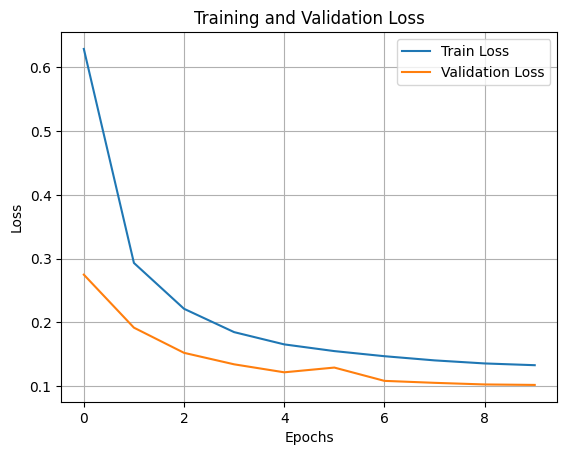

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset with a validation split
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to the range [-1, 1] for a different scaling approach
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 127.5 - 1
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 127.5 - 1

# Define a modified CNN model
model = models.Sequential()

# Convolutional and pooling layers with regularization
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Dense layers for classification with added regularization and dropout
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

# Compile the model with a modified optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with more epochs and validation data
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

